# <font color="maroon">Template: Solution-State NMR</font>

Solution-state NMR is not much different from solid-state NMR, except that we need to include the correlation time of isotropic tumbling (anisotropic tumbling not fully implemented- contact us if interested in this feature). Compare the files [HETs_15N.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/HETs_15N.txt) to [ubi_soln.txt](https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt), where ubiquitin data is from solution-state.

Note that the placeholder data in this template comes from the following paper:

C. Charlier, S.N. Khan, T. Arquardsen, P. Pelupessy, V. Reiss, D. Sakellariou, G. Bodenhausen, F. Engelke, F. Ferrage. [Nanosecond time scale motions in proteins revealed by high-resolution NMR relaxometry.](https://pubs.acs.org/doi/10.1021/ja409820g) *J. Am. Chem. Soc.* **2013** 135, 18665-72

If you intend to run on a local pyDR installation, then you just need to point pyDR to the file. If you want to run in Google Colab, the file needs to be available online somehow. We suggest a shareable weblink (for example, also available in Dropbox, Google Drive, etc.).

## Parameters
Below, you find the parameters you would typically change for your own analysis

In [1]:
#Where's  your data??
path_to_nmr_data='data/ubi_soln.txt'  #Data stored locally
# path_to_nmr_data='https://github.com/alsinmr/pyDR_tutorial/raw/main/data/ubi_soln.txt' #Github raw link
# path_to_nmr_data='https://drive.google.com/file/d/1U4mGNGyIEH9XNqDvI4qUWQZagPkwi7dx/view?usp=share_link' #Google drive share link

# How many detectors
n=4

# Do you have S2 data in your text file?
inclS2=True

#Is there a PDB ID or saved topology file associated with your structure? 
#(set =None if no structure)
topo='1D3Z'

#What Nucleus did you measure? (see below for more explanation)
Nuc='N'  #This refers to the backbone nitrogen, specifically
segids=None # Usually, segment does not need to be specified

In [0]:
# SETUP pyDR
!git clone https://github.com/alsinmr/pyDR.git

In [3]:
#Imports
import pyDR

## Load NMR Data
The best way to get load your data depends if you're running locally (just point to the file) or if you're running online (download from somewhere, mount Google Drive)

 Note that you can use commands such as 'ls', 'cd', and 'pwd' if you're confused where your files are.

In [4]:
data=pyDR.IO.readNMR(path_to_nmr_data)

## Put data into a project

Projects are convenient ways to manage a lot of data, and provide convenient tools for overlaying data in 2D plots, as well as visualizing data in 3D in ChimeraX. Not used extensively in this template.

In [5]:
proj=pyDR.Project(directory=None)    #Include a directory to save the project
proj.append_data(data)

## Attach structure to the data
Download a pdb and attach it to the data object. For protein backbone dynamics, we recommend using the labels to provide the residue number, making this step easier.

Available bonds ('Nuc')
* N,15N,N15       : Backbone N and the directly bonded hydrogen 
* C,CO,13CO,CO13  : Backbone carbonyl carbon and the carbonyl oxygen
* CA,13CA,CA13    : Backbone CA and the directly bonded hydrogen (only HA1 for glycine)
* CACB            : Backbone CA and CB (not usually relaxation relevant)
* IVL/IVLA/CH3    : Methyl groups in Isoleucine/Valine/Leucine, or ILV+Alanine, or simply all methyl groups. Each methyl group returns 3 pairs, corresponding to each hydrogen
* IVL1/IVLA1/CH31 : Same as above, except only one pair
* IVLl/IVLAl/CH3l : Same as above, but with only the 'left' leucine and valine methyl group
* IVLr/IVLAr/CH3r : Same as above, but selects the 'right' methyl group
* FY_d,FY_e,FY_z  : Phenylalanine and Tyrosine H–C pairs at either the delta, epsilon, or  zeta positions.
* FY_d1,FY_e1,FY_z1:Same as above, but only one pair returned for each amino acid

We can also filter based on residues, segments, and a filter string ([MDAnalysis](https://docs.mdanalysis.org/stable/documentation_pages/selections.html) format).

In [6]:
if topo is not None and Nuc is not None:
    data.select=pyDR.MolSelect(topo=topo)
    data.select.select_bond(Nuc=Nuc,resids=data.label,segids=None)

## Plot the data

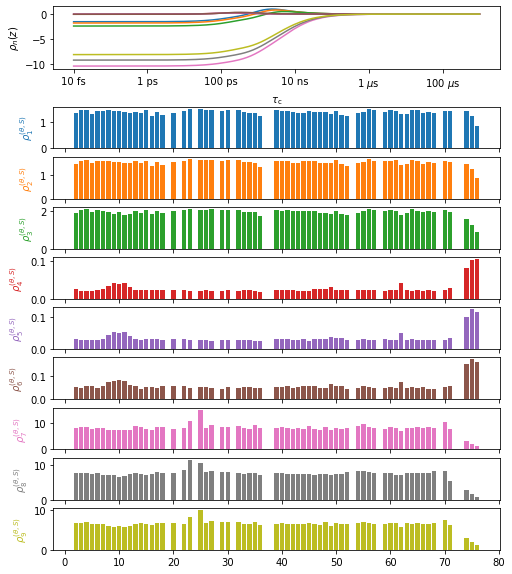

In [7]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])

## Process NMR data

In [8]:
data.detect.r_auto(n)    #Set number of detectors here

fit=data.fit()  #Fit the data

## Plot the results

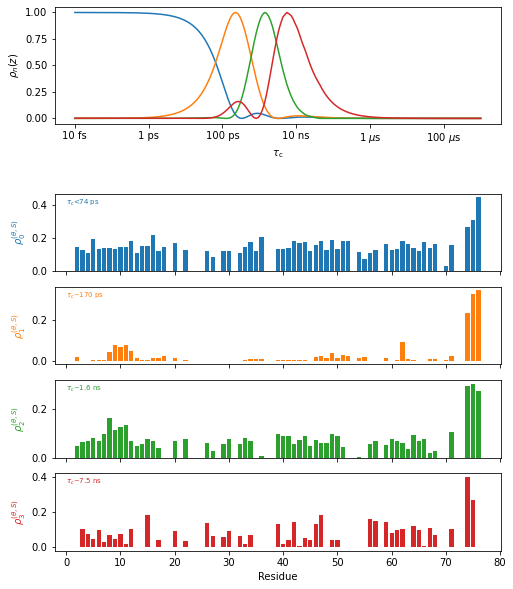

In [9]:
proj.close_fig('all')
plt_obj=fit.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])
plt_obj.show_tc()
_=plt_obj.ax[-1].set_xlabel('Residue')

## Plot the fit quality

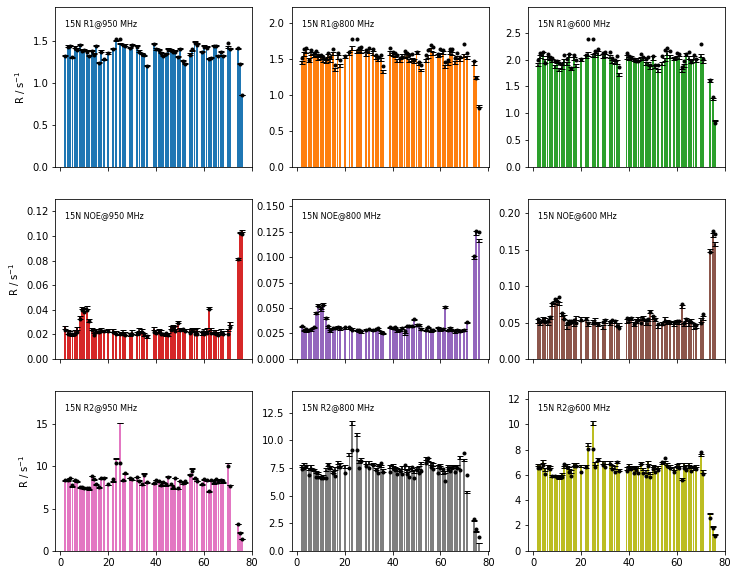

In [10]:
fig=fit.plot_fit()[0].axes.figure
fig.set_size_inches([12,10])

## Visualize with NGL viewer

In [11]:
fit.nglview(1,scaling=None)

NGLWidget(max_frame=9)

## Visualize with ChimeraX

In [13]:
fit.chimera()